In [1]:
# install sklearn and pandas
!pip install --user --upgrade pip
!pip install --user sklearn
!pip install --user pandas 
import pickle, sklearn


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# Loading the dataset

The dataset we use for the assignment is in `pickle`. `pickling` is the process whereby a Python object hierarchy is converted into a byte stream.

## Start a pickle 

* Step 1: Construct a dictionary that stores the data 
* Step 2: Open a file that will store the dictionary information 
* Step 3: Dump the data into the dictionary and close the file 

In [2]:
## Constructing a dictionary that has `List1` and `Int1`. 
List1=[1,2,3,4]
Int1=1
Data={"L1":List1, "Int1":Int1}

## open a new file. Make it write mode "wb"
with open("toy","wb") as f:
## dump the data in the file 
    pickle.dump(Data,f)



## Unpickle

* Step 1: open the file. 
* Step 2: load the file and then close

In [3]:
with open("toy", "rb") as f:
    covtype=pickle.load(f)


## Check out the content of the file 

In [4]:
for key in covtype:
    print(key)

L1
Int1


In [5]:
covtype["L1"]

[1, 2, 3, 4]

In [6]:
covtype["Int1"]

1

# Moving on to decision tree 

In [7]:
import matplotlib.pyplot as plt 
#import pandas as pd
import numpy as np 

In [8]:
with open("marketing", "rb") as f:
    dataset=pickle.load(f)
Marketing=dataset["Dataset"]

In [9]:
Marketing_X=Marketing[["Income","Year_Birth","Response"]]
Marketing_y=Marketing["Kidhome"]


## Build a tree

In [10]:
from sklearn.tree import DecisionTreeClassifier  

model=DecisionTreeClassifier()

model.fit(Marketing_X,Marketing_y)


DecisionTreeClassifier()

## Visualize Tree

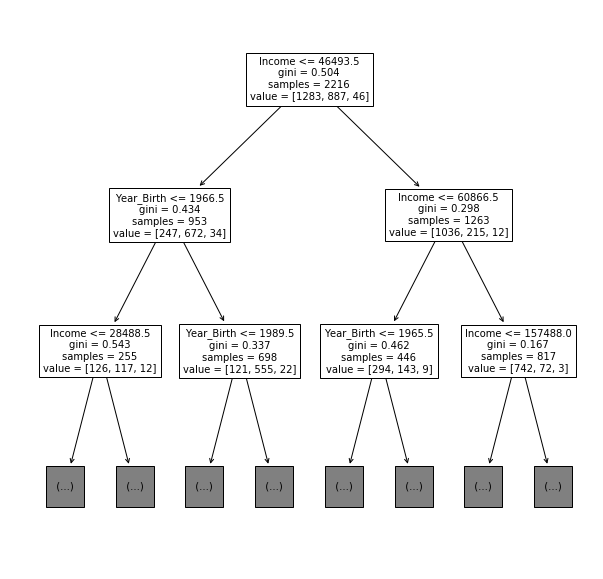

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))

plot_tree(model,max_depth=2,fontsize=10,feature_names=Marketing_X.columns)
plt.show()

## Report Accuracy

In [12]:
from sklearn.metrics import classification_report
## Initialize model 
print(classification_report(Marketing_y, model.predict(Marketing_X)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1283
           1       1.00      1.00      1.00       887
           2       1.00      1.00      1.00        46

    accuracy                           1.00      2216
   macro avg       1.00      1.00      1.00      2216
weighted avg       1.00      1.00      1.00      2216



## Cross-validation

In [13]:
from sklearn.model_selection import train_test_split
train_x,test_x, train_y, test_y=train_test_split(Marketing_X,Marketing_y,test_size=0.2)

In [21]:
model=DecisionTreeClassifier(max_depth=2,criterion="entropy")
model.fit(train_x,train_y)

AccuracyTrain = np.mean(train_y==model.predict(train_x))
AccuracyTest=np.mean(test_y==model.predict(test_x))
AccuracyTrain, AccuracyTest

(0.7782167042889391, 0.7612612612612613)

In [22]:
## Loop through a tree

In [23]:
node_depth = np.zeros(shape=model.tree_.node_count, dtype=np.int64)
## [(depth,id)]
stack = [(0, 0)]
while len(stack) > 0:
    print(stack)
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    is_split_node = model.tree_.children_left[node_id] != model.tree_.children_right[node_id]
    if is_split_node:
        stack.append((model.tree_.children_left[node_id], depth + 1))
        stack.append((model.tree_.children_right[node_id], depth + 1))

[(0, 0)]
[(1, 1), (4, 1)]
[(1, 1), (5, 2), (6, 2)]
[(1, 1), (5, 2)]
[(1, 1)]
[(2, 2), (3, 2)]
[(2, 2)]
